In [1]:
# This notebook will demonstrate slicing

import numpy as np
import skimage as ski
print(np.__file__)
print(np.__version__)
print(ski.__version__)
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf
from skimage.transform import resize
from graphviz import Graph, render
from utils.netviz import NetViz
from utils.mnistutil import MNISTUitl
from utils.sliceutil import Slice
sx = 7
sy = 7

/Users/mislam/anaconda/lib/python3.6/site-packages/numpy/__init__.py
1.16.2
0.14.2


/Users/mislam/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mn = MNISTUitl()
viz = NetViz()

In [92]:
X, Y, x, y = mn.getdata2(0,0,sx,sy)
X.shape

/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(60000, 7, 7)

In [4]:
nm , xt, yt = mn.train2(X, Y, x,y,sx,sy,10,50)

x_train shape: (60000, 7, 7, 1)
(60000, 7, 7, 1) 60000 train samples (60000,)
10000 test samples
(60000,) (60000,)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 49)                0         
_________________________________________________________________
H (Dense)                    (None, 49)                2450      
_________________________________________________________________
output (Dense)               (None, 10)                500       
Total params: 2,950
Trainable params: 2,950
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 2.2577 - acc: 0.2034

In [5]:
W1, W2, b1, b2 = slc.getweights(nm)

In [6]:
W1, W2,b1,b2 = slc.dynamicmodify(nm,xt[0],sx,sy)

In [7]:
W1.shape

(49, 49)

In [8]:
W2.shape

(49, 10)

In [83]:
zero  = []
slc = Slice()
W1, W2, b1, b2 = slc.getweights(nm)
for i in range(0,len(yt)):
    if yt[i] == 1:
        zero.append(xt[i])
print(len(zero),len(yt))

1135 10000


In [84]:
for x in zero:
    W1, W2,b1,b2 = slc.dynamicmodify(nm,x,sx,sy)

(49, 49)
0.0031103422 39.319412 10.0229435
(49,)  Here
39.319412 -36.435 MINMAX W
10.0229435 -23.833275 MINMAX W
{'p0', 'n3', 'n2', 'p1', 'n5', 'p4', 'p3', 'p2', 'n4', 'n0', 'n1'} {'n3', 'n2', 'n5', 'n4', 'n0', 'n1'}


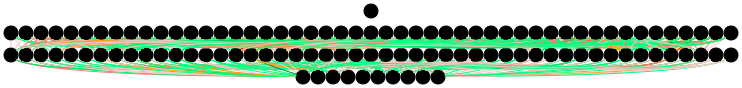

In [85]:
dot, A = slc.showstatweights(nm,zero[0],[0],sx,sy,ss = .2)
dot

(49, 49)
0.0034063822 39.319412 11.046347
(49,)  Here
39.319412 -36.435 MINMAX W
11.046347 -23.833275 MINMAX W
{'p0', 'n3', 'n2', 'p1', 'n5', 'p4', 'p3', 'p2', 'n4', 'n0', 'n1'} {'n3', 'n2', 'n5', 'n4', 'n0', 'n1'}


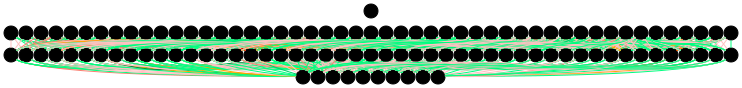

In [86]:
doto, A = viz.vispredictwights(nm, xt[0], yt[0] , sx, sy )
doto

In [94]:
slc.D1[0]
np.count_nonzero(slc.D1)

931

In [19]:
49*49

2401

In [20]:
931/ 2401

0.3877551020408163

In [21]:
np.count_nonzero(slc.D2)

392

In [24]:
np.count_nonzero(slc.W1)

2401

In [33]:
w,b = nm.layers[1].get_weights()

(49, 49)

In [88]:
print(yt[0:1])
nm.predict(xt[0:1])

[7]


array([[4.1777213e-05, 5.6586646e-07, 3.6038070e-06, 6.0828347e-03,
        1.8952492e-03, 2.3889474e-03, 9.2722303e-06, 9.0780866e-01,
        3.2322347e-04, 8.1445955e-02]], dtype=float32)

In [91]:
model , xt, yt = mn.train2(X, Y, x,y,sx,sy,10,50)

x_train shape: (60000, 7, 7, 1)
(60000, 7, 7, 1) 60000 train samples (60000,)
10000 test samples
(60000,) (60000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 49)                0         
_________________________________________________________________
H (Dense)                    (None, 49)                2450      
_________________________________________________________________
output (Dense)               (None, 10)                500       
Total params: 2,950
Trainable params: 2,950
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 2.2506 - acc: 0.2488

In [95]:
model.layers[1].set_weights([slc.D1,slc.d1])
model.layers[2].set_weights([slc.D2,slc.d2])

In [99]:
from sklearn.metrics import accuracy_score
zeros = []
pred = []
tr = []
l = 9
for i in range(0,len(yt)):
    if yt[i] == 1:
        p = model.predict(xt[i:i+1])
        m = p.argmax()
        pred.append(m)
        tr.append(1)
accuracy_score(pred,tr)

0.9480176211453745